In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (8,6)

In [2]:
x = [-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62]
y = [1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51]
x = np.array(x)
y = np.array(y)

In [3]:
def x_to_phi_x(x, k):
  n = len(x)
  phi_k_x = np.zeros((n,k+1))

  for i in range(n):
    for j in range(k+1):
      phi_k_x[i,j] = (x[i])**j

  return phi_k_x

# PDF of Gaussian multivariate for given mean and covariance matrices
def gaussian_multivariate(x, mean, covariance):
  D = mean.shape[0]

  N = 1/np.sqrt((2*np.pi)**D * np.linalg.det(covariance)) * np.exp(-0.5 * np.matmul( np.matmul((x-mean).T, np.linalg.inv(covariance)), (x-mean) ))

  return N

In [4]:
k_list = [1,2,3,4]
beta = 4

**Question 1**: 
Compute the posterior of **w**

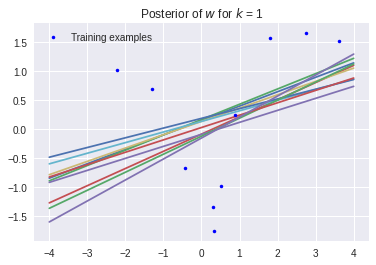

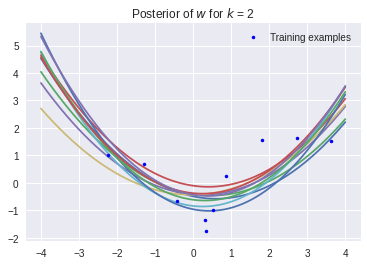

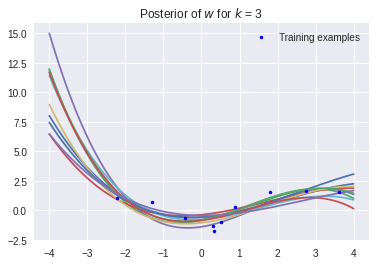

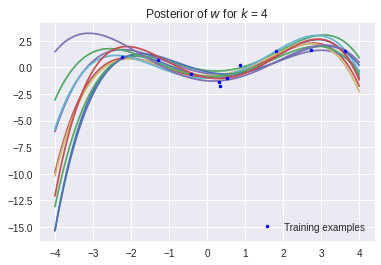

In [5]:
x_range = np.linspace(-4, 4, 200)

for k in k_list:
  phi_x = x_to_phi_x(x, k)

  # Calculating mean and covariance of w using the formulae derived in class
  w_cov = np.linalg.inv( beta*np.matmul(phi_x.T, phi_x) + np.identity(k+1) )
  w_mean = np.matmul( np.matmul( np.linalg.inv( np.matmul(phi_x.T, phi_x) + 1/beta*np.identity(k+1) ), phi_x.T), y )

  # Draw 10 random functions from the inferred posterior
  w_random = np.random.multivariate_normal(w_mean, w_cov, 10)

  phi_x_range = x_to_phi_x(x_range, k)

  for i in range(10):
    # y = Xw
    plt.plot(x_range, np.matmul(phi_x_range, w_random[i]))

  plt.plot(x, y, 'b.', label="Training examples")
  plt.title("Posterior of $w$ for $k$ = " + str(k))
  plt.legend()
  # plt.savefig("posterior_k_" + str(k) + ".png")
  plt.show()

**Question 2:** Posterior predictive

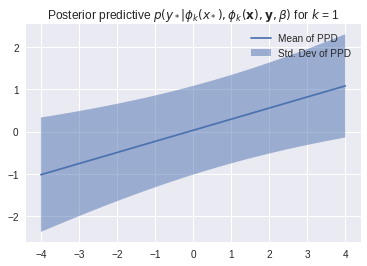

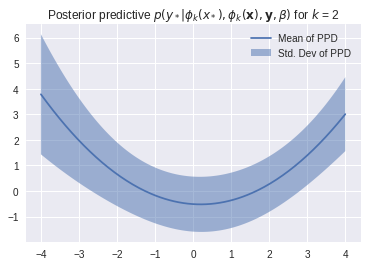

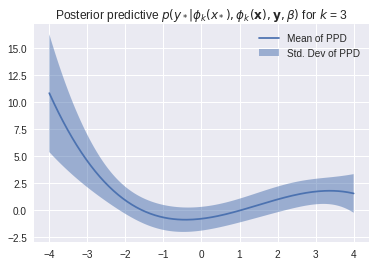

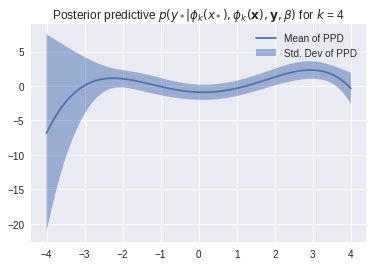

In [6]:
for k in k_list:
  phi_x = x_to_phi_x(x, k)
  phi_x_range = x_to_phi_x(x_range, k) # $x*$ in our case

  # Calculating mean and covariance of w using the formulae derived in class
  w_cov = np.linalg.inv( beta*np.matmul(phi_x.T, phi_x) + np.identity(k+1) )
  w_mean = np.matmul( np.matmul( np.linalg.inv( np.matmul(phi_x.T, phi_x) + 1/beta*np.identity(k+1) ), phi_x.T), y )

  # y* = X*w
  ppd_mean = np.matmul( phi_x_range, w_mean )
  ppd_covar = 1/beta + np.matmul( np.matmul(phi_x_range, w_cov), phi_x_range.T )
  # Finding standard deviation from variance which would be sqrt of the diagonal elements of the covariance matrix
  ppd_std_dev = np.sqrt(ppd_covar.diagonal())

  plt.plot(x_range, ppd_mean, label="Mean of PPD")
  plt.fill_between(x_range, ppd_mean-2*ppd_std_dev,ppd_mean+2*ppd_std_dev, alpha=0.5 , label="Std. Dev of PPD")
  plt.legend()
  plt.title("Posterior predictive $p(y_* | \phi_k(x_*), \phi_k(\mathbf{x}), \mathbf{y}, β )$ for $k$ = " + str(k))
  # plt.savefig("ppd_k_" + str(k) + ".png")
  plt.show()

**Question 3:** Log marginal likelihood

In [7]:
for k in k_list:
  phi_x = x_to_phi_x(x, k)

  # Mean and Covariance of the Marginal Likelihood using the formulae given in "Bayes_Tipping.pdf"
  ml_mean = np.zeros(10) # 10 since we have 10 points of y
  ml_cov = 1/beta*np.identity(10) + np.matmul(phi_x, phi_x.T)

  # Calculating the log marginal likelihood
  log_ml = np.log( gaussian_multivariate(y, ml_mean, ml_cov) )

  print("For k = " + str(k) + ", the log marginal likelihood is " + str(log_ml))

For k = 1, the log marginal likelihood is -32.352015280445244
For k = 2, the log marginal likelihood is -22.772153178782375
For k = 3, the log marginal likelihood is -22.079070642240836
For k = 4, the log marginal likelihood is -22.386776180354378


**Question 4:** Log likelihood using MAP estimate of w

In [8]:
for k in k_list:
  phi_x = x_to_phi_x(x, k)

  # We know that mean of W_{MAP} is same as the mean of posterior
  w_MAP_mean = np.matmul( np.matmul( np.linalg.inv( np.matmul(phi_x.T, phi_x) + 1/beta*np.identity(k+1) ), phi_x.T), y )
  l_mean = np.matmul( phi_x, w_MAP_mean)

  # Calculating the covariance matrix
  l_cov = 1/beta * np.identity(10)

  # Calculating the log likelihood
  log_l = np.log( gaussian_multivariate(y, l_mean, l_cov) )

  print("For k = " + str(k) + ", the log likelihood for MAP estimate is " + str(log_l))

For k = 1, the log likelihood for MAP estimate is -28.094004379075553
For k = 2, the log likelihood for MAP estimate is -15.360663659052216
For k = 3, the log likelihood for MAP estimate is -10.93584688361574
For k = 4, the log likelihood for MAP estimate is -7.225291259028605
